## Initializing Variables and getting data

In [393]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import datetime
import math
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()
from math import *
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
df = pd.concat([train,test])


## Finding missing data

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Total>0]

In [13]:
missing_data


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageCond,159,0.054471
GarageQual,159,0.054471


## Imputing missing data

In [14]:
df.PoolQC.replace(np.NaN, 0, inplace=True)
df.PoolQC.replace('Fa',1, inplace=True)
df.PoolQC.replace('TA', 2, inplace=True)
df.PoolQC.replace('Gd', 3, inplace=True)
df.PoolQC.replace('Ex', 4, inplace=True)

In [15]:
df.Alley.replace(np.NaN, 'None', inplace=True)

In [16]:
df.Fence.replace(np.NaN, 0, inplace=True)
df.Fence.replace('MnWw', 1, inplace=True)
df.Fence.replace('GdWo', 2, inplace=True)
df.Fence.replace('MnPrv', 3, inplace=True)
df.Fence.replace('GdPrv', 4, inplace=True)

In [17]:
df.FireplaceQu.replace(np.NaN, 0, inplace=True)
df.FireplaceQu.replace('Po', 1, inplace=True)
df.FireplaceQu.replace('Fa', 2, inplace=True)
df.FireplaceQu.replace('TA', 3, inplace=True)
df.FireplaceQu.replace('Gd', 4, inplace=True)
df.FireplaceQu.replace('Ex', 5, inplace=True)

In [18]:
MeanLF = df.groupby('Neighborhood').agg({'LotFrontage':'mean'})
MeanLFdict = MeanLF.LotFrontage.to_dict()
df.LotFrontage.fillna(df.Neighborhood, inplace=True)
df.LotFrontage = df.LotFrontage.replace(MeanLFdict)

In [19]:
df.GarageQual.value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [20]:
df.GarageQual.replace(np.NaN, 0, inplace=True)
df.GarageQual.replace('Po', 1, inplace=True)
df.GarageQual.replace('Fa', 2, inplace=True)
df.GarageQual.replace('TA', 3, inplace=True)
df.GarageQual.replace('Gd', 4, inplace=True)
df.GarageQual.replace('Ex', 5, inplace=True)

In [21]:
df.GarageYrBlt.fillna(df.YearBuilt, inplace=True)

In [22]:
df.GarageCond.replace(np.NaN, 0, inplace=True)
df.GarageCond.replace('Po', 1, inplace=True)
df.GarageCond.replace('Fa', 2, inplace=True)
df.GarageCond.replace('TA', 3, inplace=True)
df.GarageCond.replace('Gd', 4, inplace=True)
df.GarageCond.replace('Ex', 5, inplace=True)

In [23]:
df.GarageCond.value_counts()

3    2654
0     159
2      74
4      15
1      14
5       3
Name: GarageCond, dtype: int64

In [24]:
df.GarageFinish.replace({np.NaN : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3}, inplace=True)

In [25]:
df.GarageType.fillna('None', inplace=True)

In [26]:
df.BsmtExposure.replace({np.NaN : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4}, inplace=True)

In [27]:
df.BsmtCond.replace({np.NaN : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace=True)

In [28]:
df.BsmtQual.replace({np.NaN : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, inplace=True)

In [29]:
df.BsmtFinType1.replace({np.NaN : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}, inplace=True)

In [30]:
df.BsmtFinType2.replace({np.NaN : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}, inplace=True)

In [31]:
df.loc[1150, 'MasVnrType'] = 'BrkFace'

In [32]:
df.MasVnrType.replace({'None' : 0, 'CBlock' : 1, 'BrkCmn' : 2, 'BrkFace' : 3, 'Stone' : 4}, inplace=True)

In [33]:
df.MasVnrType.replace({np.NaN : 0}, inplace=True)

In [34]:
print(df.MasVnrArea.mean())

102.20131215469613


In [35]:
df.MasVnrArea.fillna(102, inplace=True)

In [36]:
df.BldgType.value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [37]:
df[df.BldgType=='1Fam'].MSZoning.value_counts()

RL         2009
RM          301
FV           77
C (all)      22
RH           12
Name: MSZoning, dtype: int64

In [38]:
df[df.Neighborhood=='IDOTRR'].MSZoning.value_counts()

RM         68
C (all)    22
Name: MSZoning, dtype: int64

In [39]:
df[df.Neighborhood=='Mitchel'].MSZoning.value_counts()

RL    104
RM      9
Name: MSZoning, dtype: int64

In [40]:
df.MSZoning.fillna(df.Neighborhood, inplace=True)

In [41]:
df.MSZoning.value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
IDOTRR        3
Mitchel       1
Name: MSZoning, dtype: int64

In [42]:
df.MSZoning.replace({'IDOTRR' : 'RM', 'Mitchel' : 'RL'}, inplace=True)

## Checking what is still missing

In [43]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Total>0]
missing_data

In [44]:
missing_data

,Total,Percent
MiscFeature,2814,0.964029
SalePrice,1459,0.499829
BsmtHalfBath,2,0.000685
BsmtFullBath,2,0.000685
Utilities,2,0.000685
Functional,2,0.000685
BsmtUnfSF,1,0.000343
BsmtFinSF2,1,0.000343
Exterior2nd,1,0.000343
KitchenQual,1,0.000343


## Continuing Imputation

In [45]:
df[df.BsmtHalfBath.isnull()]['BsmtFullBath']

660   NaN
728   NaN
Name: BsmtFullBath, dtype: float64

In [46]:
df.BsmtHalfBath.value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [47]:
df.BsmtHalfBath.fillna(0, inplace=True)
df.BsmtFullBath.fillna(0, inplace=True)


In [48]:
df.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [49]:
df.drop('Utilities', axis=1, inplace=True)


In [50]:
df.Functional.sort_values(ascending=True)

1304    Maj1
1040    Maj1
542     Maj1
645     Maj1
790     Maj1
529     Maj1
276     Maj1
375     Maj1
1068    Maj1
1173    Maj1
1405    Maj1
145     Maj1
636     Maj1
1088    Maj1
1139    Maj1
1229    Maj1
1293    Maj1
190     Maj1
193     Maj1
639     Maj2
606     Maj2
398     Maj2
662     Maj2
445     Maj2
406     Maj2
710     Maj2
1013    Maj2
1118    Maj2
134     Min1
804     Min1
        ... 
1033     Typ
1034     Typ
1035     Typ
1027     Typ
1016     Typ
1015     Typ
1014     Typ
993      Typ
994      Typ
995      Typ
996      Typ
997      Typ
998      Typ
999      Typ
1001     Typ
1002     Typ
1003     Typ
1004     Typ
1005     Typ
1006     Typ
1007     Typ
1008     Typ
1009     Typ
1010     Typ
1011     Typ
1012     Typ
47       Typ
1458     Typ
756      NaN
1013     NaN
Name: Functional, Length: 2919, dtype: object

In [51]:
df.groupby('Neighborhood').BsmtFinSF1.mean()

Neighborhood
Blmngtn    327.642857
Blueste    293.300000
BrDale     259.066667
BrkSide    200.607477
ClearCr    584.613636
CollgCr    489.565543
Crawfor    471.126214
Edwards    409.958763
Gilbert    244.036364
IDOTRR     155.376344
MeadowV    351.108108
Mitchel    601.017544
NAmes      484.295711
NPkVill    390.869565
NWAmes     568.488550
NoRidge    736.830986
NridgHt    743.343373
OldTown    140.133891
SWISU      295.583333
Sawyer     470.397351
SawyerW    419.600000
Somerst    390.670330
StoneBr    769.588235
Timber     698.263889
Veenker    854.583333
Name: BsmtFinSF1, dtype: float64

In [52]:
df[df.BsmtFinSF1.isnull()].Neighborhood

660    BrkSide
Name: Neighborhood, dtype: object

In [53]:
df.BsmtFinSF1.fillna(200, inplace=True)

In [54]:
df.Functional.fillna('Typ', inplace=True)

In [55]:
df.Functional.replace({'Sal' : 0, 'Sev' : 1, 'Maj2': 2, 'Maj1': 3, 'Mod' : 4, 'Min2' : 5, 'Min1' : 6, 'Typ' : 7}, inplace=True)

In [56]:
df[df.Exterior2nd.isnull()].Neighborhood

691    Edwards
Name: Neighborhood, dtype: object

In [57]:
df[df.Exterior2nd.isnull()].MasVnrType

691    0.0
Name: MasVnrType, dtype: float64

In [58]:
df[df.Exterior2nd.isnull()].BldgType

691    1Fam
Name: BldgType, dtype: object

In [59]:
df[df.Exterior2nd.isnull()].ExterQual

691    TA
Name: ExterQual, dtype: object

In [60]:
df[df.Exterior2nd.isnull()].ExterCond

691    TA
Name: ExterCond, dtype: object

In [61]:
df[df.ExterCond=='TA'].Exterior2nd.value_counts()

VinylSd    915
HdBoard    362
MetalSd    356
Wd Sdng    327
Plywood    231
CmentBd    117
Wd Shng     69
BrkFace     42
Stucco      40
AsbShng     29
Brk Cmn     21
ImStucc     15
Stone        6
AsphShn      3
CBlock       3
Other        1
Name: Exterior2nd, dtype: int64

In [62]:
df[df.Exterior2nd=='VinylSd'].MasVnrType.value_counts()

0.0    502
3.0    352
4.0    157
2.0      3
Name: MasVnrType, dtype: int64

In [63]:
df.Exterior2nd.fillna('VinylSd', inplace=True)

## Checking what is still to be done

In [64]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Total>0]
missing_data

,Total,Percent
MiscFeature,2814,0.964029
SalePrice,1459,0.499829
TotalBsmtSF,1,0.000343
GarageCars,1,0.000343
GarageArea,1,0.000343
SaleType,1,0.000343
BsmtUnfSF,1,0.000343
KitchenQual,1,0.000343
Electrical,1,0.000343
BsmtFinSF2,1,0.000343


In [65]:
df[(df.BsmtFinSF1>0) & (df.BsmtFinSF1<400)].TotalBsmtSF.mean()

966.4623115577889

In [66]:
df.TotalBsmtSF.fillna(966, inplace=True)

## Fixing Garages s.t. other vars are 0 if garagequal is 0

In [67]:
df.GarageCars.median()

2.0

In [68]:
df[df.GarageCars.isnull()].GarageQual

1116    0
Name: GarageQual, dtype: int64

In [69]:
df[df.GarageQual==0].GarageYrBlt.replace(df.GarageQual, inplace=True)


In [70]:
df.GarageYrBlt.loc[df.GarageQual==0] = 0

In [71]:
df.GarageArea.loc[df.GarageQual==0] = 0

In [72]:
df.GarageQual.loc[df.GarageQual==0] = 0

In [73]:
df.GarageCond.loc[df.GarageQual==0] = 0

In [ ]:
df.GarageCars.fillna(0, inplace=True)

## Dropping my 2nd feature after utilities

In [74]:
df.drop('MiscFeature', axis=1, inplace=True)

## Finding bsmtfintype based on neighborhood

In [75]:
df.groupby('Neighborhood').BsmtFinSF2.mean()

Neighborhood
Blmngtn      0.000000
Blueste     61.200000
BrDale       9.800000
BrkSide     19.850467
ClearCr    196.431818
CollgCr     27.498127
Crawfor     62.834951
Edwards     46.654639
Gilbert      0.684848
IDOTRR      18.569892
MeadowV     44.783784
Mitchel     46.701754
NAmes       83.634312
NPkVill     89.782609
NWAmes      62.496183
NoRidge     90.408451
NridgHt      9.114458
OldTown     21.334728
SWISU       26.291667
Sawyer     125.602649
SawyerW     67.352000
Somerst      8.351648
StoneBr     29.745098
Timber      44.208333
Veenker    255.083333
Name: BsmtFinSF2, dtype: float64

In [76]:
df.BsmtFinSF2.fillna(20, inplace=True)

In [77]:
df.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [78]:
df[df.SaleType=='WD'].SaleCondition.value_counts()

Normal     2314
Abnorml     133
Family       38
Alloca       24
AdjLand      12
Partial       4
Name: SaleCondition, dtype: int64

In [79]:
df[df.SaleCondition=='Normal'].SaleType.value_counts()

WD       2314
COD        39
ConLD      21
CWD        10
ConLw       7
ConLI       5
Con         4
Oth         1
Name: SaleType, dtype: int64

In [80]:
df.SaleType.fillna('WD', inplace=True)

In [81]:
df.BsmtUnfSF.fillna(df.BsmtUnfSF.mean(), inplace=True)


## Another check in

In [82]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Total>0]
missing_data

,Total,Percent
SalePrice,1459,0.499829
Exterior1st,1,0.000343
GarageCars,1,0.000343
KitchenQual,1,0.000343
Electrical,1,0.000343


In [83]:
df[df.Exterior1st.isnull()].Exterior2nd

691    VinylSd
Name: Exterior2nd, dtype: object

In [84]:
df[df.Exterior2nd=='VinylSd'].Exterior1st.value_counts()

VinylSd    1005
Wd Sdng       3
MetalSd       2
Plywood       1
AsbShng       1
BrkFace       1
CBlock        1
Name: Exterior1st, dtype: int64

In [85]:
df.Exterior1st.fillna('VinylSd', inplace=True)

In [86]:
df[df.KitchenQual.isnull()].KitchenAbvGr

95    1
Name: KitchenAbvGr, dtype: int64

In [87]:
df[df.YearBuilt<1925].KitchenQual.value_counts()

TA    198
Gd     57
Fa     30
Ex      7
Name: KitchenQual, dtype: int64

In [88]:
df.KitchenQual.fillna('TA', inplace=True)

In [89]:
df.Electrical.fillna('Sbrkr', inplace=True)

## Changing variable types and making factors ordinal

In [90]:
df.BsmtCond = pd.to_numeric(df.BsmtCond)


In [92]:
df.Alley.replace({'None' : 0, 'Grvl' : 1, 'Pave' : 2}, inplace=True)

In [93]:
df.CentralAir.replace({'Y' : 0, 'N' : 1}, inplace=True)


In [94]:
df.PavedDrive.replace({'N' : 0, 'P' : 1, 'Y' : 2}, inplace=True)


In [95]:
df.ExterCond.replace({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace=True)

In [96]:
df.ExterQual.replace({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace=True)

In [97]:
df.Street.replace({'Grvl' : 0, 'Pave' : 1}, inplace=True)

In [98]:
df.KitchenQual.replace({'Po' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}, inplace=True)

In [99]:
df.HouseStyle.replace({'SFoyer' : 0, 'SLvl' : 1, '1Story' : 2, '1.5Unf' : 3, '1.5Fin': 4, '2Story' : 5, '2.5Unf' : 6, '2.5Fin' : 7}, inplace=True)

In [100]:
df.LandSlope.replace({'Sev' : 0, 'Gtl' : 1, 'Mod' : 2}, inplace=True)


In [101]:
df.drop('Id', inplace=True, axis=1)

## Dummifying

In [419]:
numvars = df.select_dtypes(include=['int64', 'float64']).columns.values
num_ = df[numvars]

In [420]:
objectvars = df.select_dtypes(include=['object']).columns.values
obj_ = df[objectvars]

In [421]:
obj_dummy_vars = pd.DataFrame()
for col in obj_.columns.values:
    dummy = pd.get_dummies(obj_[col])
    dummy.drop(dummy.columns[1], axis=1,inplace=True)
    obj_dummy_vars = pd.concat([obj_dummy_vars, dummy], axis=1)

In [422]:
df2 = pd.concat([num_, obj_dummy_vars], axis=1)

## splitting DF

In [423]:
df2.fillna(0, inplace=True)

In [354]:
train = df2[0:1460]

In [424]:
test = df2[1460:2919]

In [401]:
y_train = train.SalePrice

In [402]:
y_train = np.log(y_train)

In [358]:
x_train = train.drop('SalePrice', axis=1)

In [425]:
x_test = test.drop('SalePrice', axis=1)

In [368]:
x_train.dtypes.value_counts()


uint8      136
int64       46
float64     12
dtype: int64

In [426]:
x_test.dtypes.value_counts()

uint8      136
int64       46
float64     12
dtype: int64

## Using Lasso to drop variables

(array([  4.,   2.,  12.,  70., 632., 653.,  79.,   6.,   1.,   1.]),
 array([-6.75789901e-01, -5.40632289e-01, -4.05474678e-01, -2.70317067e-01,
        -1.35159456e-01, -1.84447919e-06,  1.35155767e-01,  2.70313378e-01,
         4.05470989e-01,  5.40628601e-01,  6.75786212e-01]),
 <a list of 10 Patch objects>)

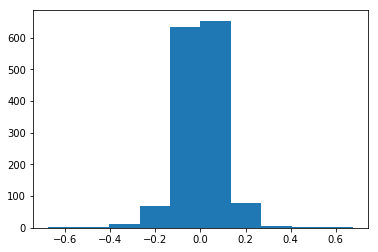

In [404]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
residuals = y_train - lm.predict(x_train)
plt.hist(residuals)

In [405]:
print('R^2 is equal to %.3f' %(lm.score(x_train, y_train)))



R^2 is equal to 0.939


In [406]:
N_alpha = 100
alphaRange = np.logspace(-10, 2, N_alpha)
grid_para_lasso = [{
    'alpha' : alphaRange,
}]

In [407]:
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, grid_para_lasso, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_lasso.fit(x_train, y_train)

CPU times: user 3.41 s, sys: 349 ms, total: 3.76 s
Wall time: 27.9 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-10, 1.32194115e-10, 1.74752840e-10, 2.31012970e-10,
       3.0538...
       4.97702356e-01, 6.57933225e-01, 8.69749003e-01, 1.14975700e+00,
       1.51991108e+00, 2.00923300e+00, 2.65608778e+00, 3.51119173e+00,
       4.64158883e+00, 6.13590727e+00, 8.11130831e+00, 1.07226722e+01,
       1.41747416e+01, 1.87381742e+01, 2.47707636e+01, 3.27454916e+01,
       4.32876128e+01, 5.72236766e+01, 7.56463328e+01, 1.00000000e+02])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [408]:
grid_search_lasso.best_params_

{'alpha': 0.0006135907273413176}

In [409]:
lasso.set_params(alpha=0.0006, normalize=False, max_iter=1e5)
lasso.fit(x_train, y_train)
lassoCoef = pd.Series(lasso.coef_, index=x_train.columns)
print('The slopes are \n%s' %(lassoCoef[lassoCoef!=0]))
lasso.score(x_train, y_train)

The slopes are 
1stFlrSF         0.000025
3SsnPorch        0.000195
Alley            0.004466
BedroomAbvGr     0.002865
BsmtExposure     0.015407
BsmtFinSF1       0.000034
BsmtFinSF2       0.000039
BsmtFinType1     0.006866
BsmtFinType2    -0.002121
BsmtFullBath     0.029384
BsmtQual         0.016718
CentralAir      -0.041732
EnclosedPorch    0.000145
ExterCond       -0.005322
ExterQual        0.002281
Fence           -0.002229
FireplaceQu      0.010013
Fireplaces       0.005788
FullBath         0.018236
Functional       0.029471
GarageArea       0.000057
GarageCars       0.038094
GarageCond       0.001196
GarageFinish     0.006277
GarageQual       0.028949
GarageYrBlt     -0.000034
GrLivArea        0.000223
HalfBath         0.018406
HouseStyle      -0.003709
KitchenQual      0.018937
                   ...   
BrkTil          -0.014440
PConc            0.019564
BuiltIn         -0.006615
GasW             0.011625
Ex               0.025567
Gd               0.000791
Bnk             -0.033

0.9228493378450263

## Getting Lasso Important Vars


In [410]:
sig_vars = lassoCoef[lassoCoef!=0].index

In [411]:
x_train2 = x_train[sig_vars]

## Trying ElasticNet (net) 

In [412]:
N_alpha = 100
N_rho   = 11
alphaRange = np.logspace(-10, 2, N_alpha)
rhoRange   = np.linspace(0,1, N_rho)

In [413]:
grid_para_net = [{
    'alpha' : alphaRange,
    'l1_ratio' : rhoRange
}]

In [414]:
net = ElasticNet()
grid_search_net = GridSearchCV(net, grid_para_net, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_net.fit(x_train2, y_train)

CPU times: user 13.6 s, sys: 688 ms, total: 14.3 s
Wall time: 48.1 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-10, 1.32194115e-10, 1.74752840e-10, 2.3...
       1.51991108e+00, 2.00923300e+00, 2.65608778e+00, 3.51119173e+00,
       4.64158883e+00, 6.13590727e+00, 8.11130831e+00, 1.07226722e+01,
       1.41747416e+01, 1.87381742e+01, 2.47707636e+01, 3.27454916e+01,
       4.32876128e+01, 5.72236766e+01, 7.56463328e+01, 1.00000000e+02]),
                          'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}],
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [415]:
grid_search_net.best_params_

{'alpha': 0.0010722672220103231, 'l1_ratio': 0.1}

In [416]:
grid_search_net.best_score_

0.8851773935635097

## Best Model is net, now predicting net

In [417]:
net = ElasticNet()
net.set_params(alpha=0.001, l1_ratio=0.1, normalize=False, max_iter=1e5)
net.fit(x_train2, y_train)
netCoef = pd.Series(net.coef_, index=x_train2.columns)
net.score(x_train2, y_train)

0.9234569490932965

In [427]:
x_test = x_test[sig_vars]

In [428]:
net_predict = net.predict(x_test)

In [429]:
test_index = pd.read_csv('test.csv')


In [430]:
output = pd.DataFrame(columns=['Id', 'SalePrice'])

In [431]:
output.Id = test_index.Id

In [434]:
output.SalePrice = np.exp(net_predict)

In [435]:
output.to_csv('submission_net.csv', index=False)

## Trying LASSO

In [440]:
lasso = Lasso()
lasso.set_params(alpha=0.0006, normalize=False, max_iter=1e5)
lasso.fit(x_train2, y_train)
lassoCoef = pd.Series(lasso.coef_, index=x_train2.columns)
lasso.score(x_train2, y_train)

0.9228492984500286

In [441]:
lasso_predict = lasso.predict(x_test)

In [442]:
output = pd.DataFrame(columns=['Id', 'SalePrice'])
output.Id = test_index.Id
output.SalePrice = np.exp(lasso_predict)
output.to_csv('submission_lasso.csv', index=False)

# score of 0.125

## Trying BOOST

In [444]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

gbm = GradientBoostingRegressor()

In [540]:
grid_para_gbm = [{
    #'learning_rate': np.linspace(0.01, 0.1, 10)
    #,
    'n_estimators': np.arange(500,10000,1000)
    #,
    #'subsample' : np.linspace(0.01,1,5),
    #max_depth' : np.arange(1,10,2),
    #'max_features': np.arange(1,10,2)
    
}]

In [543]:
gbm = GradientBoostingRegressor(n_estimators=7000,subsample=0.5, learning_rate=0.01, max_depth=3, max_features=7)
grid_search_gbm = GridSearchCV(gbm, grid_para_gbm, scoring='r2', cv=5, n_jobs=-1)
%time grid_search_gbm.fit(x_train2, y_train)

KeyboardInterrupt: 

In [542]:
grid_search_gbm.best_params_

{'n_estimators': 8500}

In [544]:
gbm = GradientBoostingRegressor(n_estimators=7000,subsample=0.5, learning_rate=0.01, max_depth=3, max_features=7)

In [547]:
gbm.fit(x_train2, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=7, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=7000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [595]:
gbm_predict = gbm.predict(x_test)
output = pd.DataFrame(columns=['Id', 'SalePrice'])
output.Id = test_index.Id
output.SalePrice = np.exp(gbm_predict)
output.to_csv('submission_gbm.csv', index=False)

# score of 0.125

In [596]:
gbmlasso_predict = (gbp_predict+lasso_predict)/2
output = pd.DataFrame(columns=['Id', 'SalePrice'])
output.Id = test_index.Id
output.SalePrice = np.exp(gbmlasso_predict)
output.to_csv('submission_gbmlasso.csv', index=False)

#score of .121

In [606]:
features = pd.DataFrame(lassoCoef[lassoCoef!=0].sort_values(ascending=False))

In [608]:
features[features.index=='OverallQual']

,0
OverallQual,0.057335


In [611]:
x_test.ClyTile.value_counts()

0    1459
Name: ClyTile, dtype: int64

In [615]:
x_train2['C (all)'].value_counts()

0    1450
1      10
Name: C (all), dtype: int64

In [650]:
x_test.LotArea.mean()

9819.161069225496

In [649]:
features.loc['LotArea']

0    0.000002
Name: LotArea, dtype: float64

In [648]:
featuresexp.loc['LotArea']

0    1.000002
Name: LotArea, dtype: float64

In [624]:
featuresexp = np.exp(features)

In [630]:
featuresexp.sort_values(by=0, ascending=True)



,0
ClyTile,0.328452
C (all),0.750408
PosN,0.775441
Abnorml,0.945289
RM,0.946969
CentralAir,0.959126
Edwards,0.961719
MeadowV,0.964059
Bnk,0.967287
WD,0.968880


In [642]:
featurecheck = pd.merge(pd.DataFrame(x_test.max()), featuresexp, left_index=True, right_index=True)

In [643]:
featurecheck['portion'] = featurecheck['0_x']*featurecheck['0_y']

In [644]:
featurecheck.sort_values(by='portion', ascending=False)

,0_x,0_y,portion
LotArea,56600.0,1.000002,56600.106343
MiscVal,17000.0,0.999997,16999.941201
GrLivArea,5095.0,1.000223,5096.137870
TotalBsmtSF,5095.0,1.000027,5095.139312
1stFlrSF,5095.0,1.000025,5095.129795
BsmtFinSF1,4010.0,1.000034,4010.137757
GarageYrBlt,2207.0,0.999966,2206.925620
YearBuilt,2010.0,1.001485,2012.984796
YearRemodAdd,2010.0,1.000696,2011.398962
YrSold,2010.0,0.996643,2003.251460


In [645]:
featurecheck.portion.sum()

111995.71643005527